In [162]:
import nltk
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [163]:
df=pd.read_csv('text.csv')

In [164]:
df.head()

,Unnamed: 0,Text
0,0,Not Verified | Our A380 developed a fault taxi...
1,1,Not Verified | Horrible airline. Does not care...
2,2,✅ Trip Verified | My family and I have flown m...
3,3,✅ Trip Verified | This has been by far the wor...
4,4,✅ Trip Verified | In Nov 2022 I booked and pai...


In [165]:
df.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [166]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [167]:
df.head()

,Text
0,Not Verified | Our A380 developed a fault taxi...
1,Not Verified | Horrible airline. Does not care...
2,✅ Trip Verified | My family and I have flown m...
3,✅ Trip Verified | This has been by far the wor...
4,✅ Trip Verified | In Nov 2022 I booked and pai...


In [168]:
def split_text(text):
  text=text.split('|')
  if text[0] not in ['Not Verified ','✅ Trip Verified ','❎ Unverified ','❎ Not Verified ']:
    return 'Unkwon'
  else:
    return text[0]


In [169]:
df['verification']=df['Text'].apply(split_text)


In [170]:
df['verification']=df['verification'].str.strip('✅')
df['verification']=df['verification'].str.strip('❎')

In [171]:
df['verification'].value_counts()

Unkwon             2294
 Trip Verified     1078
Not Verified        203
 Unverified          20
 Not Verified         5
Name: verification, dtype: int64

In [172]:
texts=[]
def get_text(text):
  text=text.split('|')
  if text[0] not in ['Not Verified ','✅ Trip Verified ','❎ Unverified ','❎ Not Verified ']:
     return text[0]
  else:
     return text[1]


In [173]:
df['texts']=df['Text'].apply(get_text)

In [174]:
df.isna().sum()

Text            0
verification    0
texts           0
dtype: int64

In [175]:
df.drop('Text',axis=1,inplace=True)

In [176]:
df.head()

,verification,texts
0,Not Verified,Our A380 developed a fault taxiing to the run...
1,Not Verified,Horrible airline. Does not care about their c...
2,Trip Verified,My family and I have flown mostly on British ...
3,Trip Verified,This has been by far the worst service I have...
4,Trip Verified,In Nov 2022 I booked and paid for a return jo...


#Now we would be anlysing 1st Verified Data only

In [177]:
filter=df['verification']==' Trip Verified '
fd=df[filter]

In [178]:
fd.reset_index(inplace=True)

In [179]:
fd.drop('index',axis=1,inplace=True)

<ipython-input-179-16527070b650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop('index',axis=1,inplace=True)


#Now preprocessing the texts using NLP

In [180]:
fd.head()

,verification,texts
0,Trip Verified,My family and I have flown mostly on British ...
1,Trip Verified,This has been by far the worst service I have...
2,Trip Verified,In Nov 2022 I booked and paid for a return jo...
3,Trip Verified,24 hours before our departure on BA059 to Cap...
4,Trip Verified,We arrived at Heathrow at 0600 to find our fl...


In [181]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [182]:
List=stopwords.words('english')

In [183]:
# removing stop word
def preprocess(text):
  temp=[]
  text=text.lower()
  text=text.split()
  for word in text:
    if word not in List:
      temp.append(word)
    else:
      temp.append('')
  return ' '.join(temp)



In [184]:
fd['Text']=fd['texts'].apply(preprocess)

<ipython-input-184-bf81a30d4fa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Text']=fd['texts'].apply(preprocess)


In [185]:
import re

In [186]:
def remove_numbers_and_special(text):
    # Remove numbers and special symbols (anything that is not a letter or whitespace)
    return re.sub(r'[^A-Za-z\s]', '', text)


In [187]:
fd['Text']=fd['Text'].apply(remove_numbers_and_special)

<ipython-input-187-e5a7f7f2e1b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Text']=fd['Text'].apply(remove_numbers_and_special)


In [188]:
fd.head()

,verification,texts,Text
0,Trip Verified,My family and I have flown mostly on British ...,family flown mostly british airways las...
1,Trip Verified,This has been by far the worst service I have...,far worst service plane obvious ...
2,Trip Verified,In Nov 2022 I booked and paid for a return jo...,nov booked paid return journey new zeal...
3,Trip Verified,24 hours before our departure on BA059 to Cap...,hours departure ba cape town heathrow t...
4,Trip Verified,We arrived at Heathrow at 0600 to find our fl...,arrived heathrow find flight ibiza can...


#Get visualization top words

In [189]:
from wordcloud import WordCloud
wc=WordCloud(max_words=2000)

In [190]:
top_words=wc.generate(fd['Text'].str.cat(sep=' '))

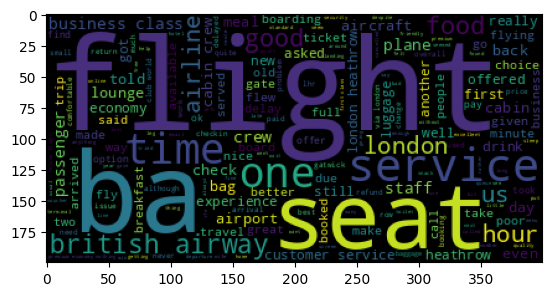

<Figure size 2000x2000 with 0 Axes>

In [191]:
plt.imshow(top_words)
plt.figure(figsize=(20,20))
plt.show()

In [192]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [193]:
def stemming(text):
  temp=[]
  text=text.split()
  for word in text:
    temp.append(ps.stem(word))
  return ' '.join(temp)




In [194]:
fd['Text']=fd['Text'].apply(stemming)

<ipython-input-194-3cbe5bd03c53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Text']=fd['Text'].apply(stemming)


In [195]:
x=fd.iloc[:,-1].values

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(max_features=1000)
x=vectorizer.fit_transform(x).toarray()

In [197]:
x[0]#String Vectoriation

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10965648, 0.04534641, 0.        , 0.        , 0.08889461,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07483272, 0.        , 0.        ,
       0.        , 0.0576546 , 0.        , 0.        , 0.     

#Using Clustering to diiference them into positive and negative

In [198]:
from sklearn.cluster import KMeans
wccs=[]
for i in range(0,10):
  Kmeans=KMeans(n_clusters=i+1,init='k-means++',random_state=42)
  Kmeans.fit(x)
  wccs.append(Kmeans.inertia_)
wccs


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[992.241424112282,
 978.073888912145,
 970.5544255939154,
 963.9862486758566,
 959.3889415706378,
 955.1266012665899,
 952.0410495637652,
 948.5961391161427,
 945.1586472815209,
 942.5971660695311]

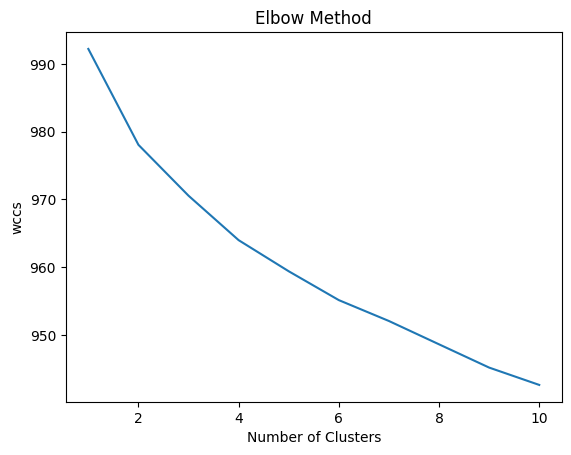

In [199]:
plt.plot(range(1,11),wccs)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wccs')
plt.show()

#We can see small edge at 2 hence we would go with 2 cluster i.e positive and negative

In [200]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [201]:
fd['Cluster_labels']=y_kmeans

<ipython-input-201-a0442aab35d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Cluster_labels']=y_kmeans


In [202]:
fd.head()

,verification,texts,Text,Cluster_labels
0,Trip Verified,My family and I have flown mostly on British ...,famili flown mostli british airway last year p...,0
1,Trip Verified,This has been by far the worst service I have...,far worst servic plane obviou fli economi freq...,0
2,Trip Verified,In Nov 2022 I booked and paid for a return jo...,nov book paid return journey new zealand retur...,1
3,Trip Verified,24 hours before our departure on BA059 to Cap...,hour departur ba cape town heathrow thursday t...,0
4,Trip Verified,We arrived at Heathrow at 0600 to find our fl...,arriv heathrow find flight ibiza cancel ba exp...,1


In [203]:
def classify(val):
  if val==0:
    return 'positive'
  else:
    return 'negative'

In [204]:
fd['Cluster_labels']=fd['Cluster_labels'].apply(classify)

<ipython-input-204-eb520bcf32e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['Cluster_labels']=fd['Cluster_labels'].apply(classify)


In [205]:
fd.drop('Text',axis=1,inplace=True)

<ipython-input-205-186df73f2149>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd.drop('Text',axis=1,inplace=True)


In [206]:
fd.head(25)

,verification,texts,Cluster_labels
0,Trip Verified,My family and I have flown mostly on British ...,positive
1,Trip Verified,This has been by far the worst service I have...,positive
2,Trip Verified,In Nov 2022 I booked and paid for a return jo...,negative
3,Trip Verified,24 hours before our departure on BA059 to Cap...,positive
4,Trip Verified,We arrived at Heathrow at 0600 to find our fl...,negative
5,Trip Verified,Original flight was cancelled with no explana...,negative
6,Trip Verified,Flight fine. In-line with competitors. Pleasa...,positive
7,Trip Verified,Came from Glasgow to London and took connecti...,negative
8,Trip Verified,My flight on on 12 May 2023 got delayed an ho...,negative
9,Trip Verified,After travelling London to Madrid with Britis...,negative


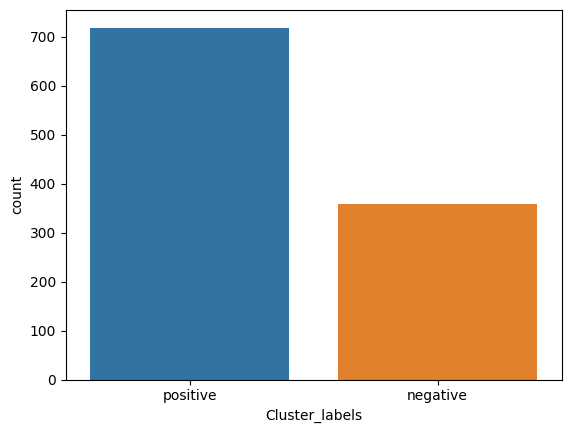

In [207]:
sns.countplot(x='Cluster_labels',data=fd)
plt.show()

#Visualizing Word cloud for Positive Reviews

In [208]:
from wordcloud import WordCloud
wc=WordCloud(max_words=100)


In [209]:
top_words=wc.generate(fd[fd['Cluster_labels']=='negative']['texts'].str.cat(sep=' '))

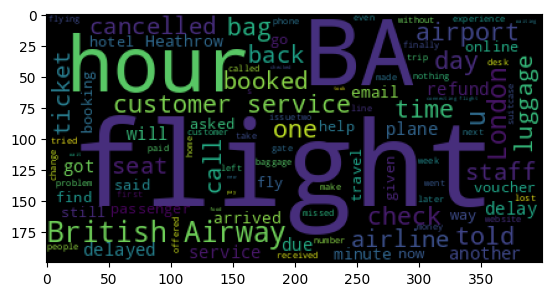

In [210]:
plt.imshow(top_words)

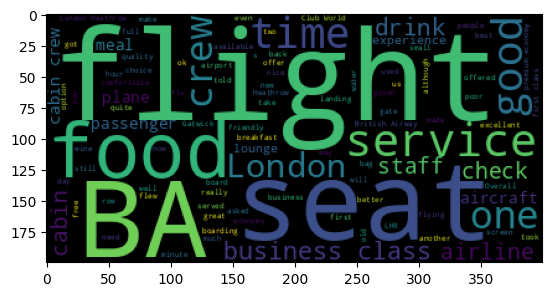

In [211]:
top_words=wc.generate(fd[fd['Cluster_labels']=='positive']['texts'].str.cat(sep=' '))
plt.imshow(top_words)

In [212]:
fd.to_csv('Results_Verified.csv')